In [6]:
import numpy as np
import pyqtgraph as pg
from PyQt6 import QtGui, QtCore
from PyQt6.QtWidgets import QDockWidget, QWidget, QMainWindow
from PyQt6.QtCore import QPointF
import PyQt6

In [51]:
image=np.eye(3)
print(image)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [52]:
win = pg.GraphicsLayoutWidget()
plot1 = pg.PlotItem()
img = pg.ImageItem( image, levels=(0,1) )
tr = QtGui.QTransform()  # prepare ImageItem transformation:
tr.scale(6.0, 3.0)       # scale horizontal and vertical axes
tr.translate(-1.5, -1.5) # move 3x3 image to locate center at axis origin
img.setTransform(tr)
plot1.addItem( img )  # add ImageItem to PlotItem
plot1.showAxes(True)  # frame it with a full set of axes
plot1.invertY(True)   # vertical axis counts top to bottom
print(plot1)

In [58]:
main = QMainWindow()
win = pg.GraphicsView()
win.setCentralItem(img)
#win.show()
#widget = pg.PlotWidget()
#widget.addItem(img)
#main = QDockWidget("Testing Window")
#popwidget = QWidget()
#popwidget.setLayou
main.setCentralWidget(win)
main.show()

RuntimeError: wrapped C/C++ object of type ImageItem has been deleted

In [9]:
point = {'pos': ([0.05638842, 0.01019244])}
print(point['pos'][0])
q = QPointF()
q.setX(point['pos'][0])
q.setY(point['pos'][1])
print(q)
print(q.x())
print(q.y())

0.05638842
PyQt6.QtCore.QPointF(0.05638842, 0.01019244)
0.05638842
0.01019244


In [ ]:
data = []
data.append({})

for i in range(2):
    for n, key in enumerate(sorted(data[i].keys)):
        for m, item in enumerate(data[i][key]):
            print()

In [18]:
import pyqtgraph as pg
from pyqtgraph.graphicsItems import ROI

pg.mkQApp()

plot = pg.PlotWidget()
# moving_item = pg.TextItem("Moving", anchor=(0.5, 0.5))
moving_item = pg.TextItem("Moving")
still_item = pg.TextItem("Still", anchor=(0.5, 0.5))

still_item.setFlag(still_item.GraphicsItemFlag.ItemIgnoresTransformations)
# ^^^ This line is necessary

roi_item = ROI.RectROI(pos=[0,0], size=0.5, pen=(255,255,255))
# roi_item.setZValue(20)

plot.addItem(roi_item)
roi_item.show()

moving_item.setParentItem(roi_item)
# plot.addItem(moving_item, ignoreBounds=True)
# Use this instead of `plot.addItem`
still_item.setParentItem(plot.plotItem)

# This position will be in pixels, not scene coordinates since transforms are ignored.
# You can use helpers like `mapFromScene()` etc. to translate between pixels
# and viewbox coordinates
still_item.setPos(300, 300)

plot.show()

pg.exec()

0

In [ ]:
"""
def contextMenuEvent(self, event):
    self.menu = QtGui.QMenu(self)
    renameAction = QtGui.QAction('Rename', self)
    renameAction.triggered.connect(lambda: self.renameSlot(event))
    self.menu.addAction(renameAction)
    # add other required actions
    self.menu.popup(QtGui.QCursor.pos())
    ...

def renameSlot(self, event):
    print "renaming slot called"
    # get the selected row and column
    row = self.tableWidget.rowAt(event.pos().y())
    col = self.tableWidget.columnAt(event.pos().x())
    # get the selected cell
    cell = self.tableWidget.item(row, col)
    # get the text inside selected cell (if any)
    cellText = cell.text()
    # get the widget inside selected cell (if any)
    widget = self.tableWidget.cellWidget(row, col)
"""

In [1]:
pip install qtwidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


https://www.pythonguis.com/widgets/equalizerbar/ \
https://www.pythonguis.com/tutorials/plotting-matplotlib/ \
https://stackoverflow.com/questions/22874583/display-a-2d-histogram-in-pyqtgraph-with-correct-axes \
https://stackoverflow.com/questions/27156381/python-creating-a-2d-histogram-from-a-numpy-matrix

Text(0, 0.5, 'Counts')

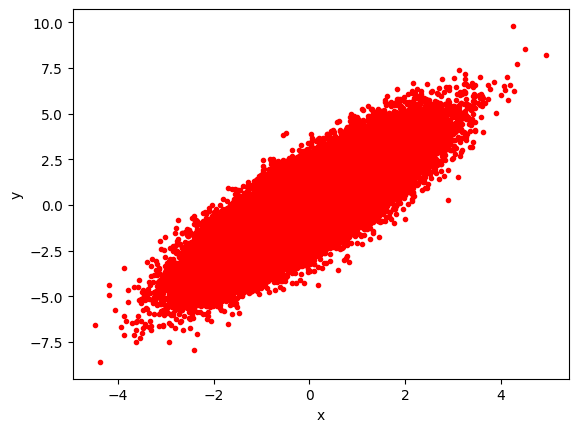

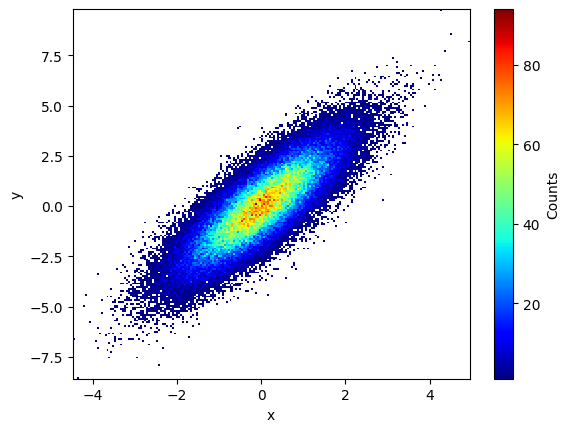

In [21]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

# np.set_printoptions(threshold=sys.maxsize)

# Create some random numbers
n = 100000
x = np.random.randn(n)
y = (1.5 * x) + np.random.randn(n)
 
# Plot data
fig1 = plt.figure()
plt.plot(x,y,'.r')
plt.xlabel('x')
plt.ylabel('y')

# Estimate the 2D histogram
nbins = 200
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
 
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# print(f"H: {H}")
 
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
# print(f"Hmasked: {Hmasked}")
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked,cmap='jet')
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

In [ ]:
import sys
import random
import matplotlib
matplotlib.use('QtAgg')

from PyQt6 import QtCore, QtWidgets

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.figure import Figure

class MplCanvas(FigureCanvas):

    def __init__(self, parent=None, width=5, height=4, dpi=100):
        fig = Figure(figsize=(width, height), dpi=dpi)
        self.axes = fig.add_subplot(111)
        super(MplCanvas, self).__init__(fig)

class MainWindow(QtWidgets.QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        self.canvas = MplCanvas(self, width=5, height=4, dpi=100)
        self.setCentralWidget(self.canvas)

        n_data = 50
        self.xdata = list(range(n_data))
        self.ydata = [random.randint(0, 10) for i in range(n_data)]

        # We need to store a reference to the plotted line
        # somewhere, so we can apply the new data to it.
        self._plot_ref = None
        self.update_plot()

        self.show()

        # Setup a timer to trigger the redraw by calling update_plot.
        self.timer = QtCore.QTimer()
        self.timer.setInterval(100)
        self.timer.timeout.connect(self.update_plot)
        self.timer.start()

    def update_plot(self):
        # Drop off the first y element, append a new one.
        self.ydata = self.ydata[1:] + [random.randint(0, 10)]

        # Note: we no longer need to clear the axis.
        if self._plot_ref is None:
            # First time we have no plot reference, so do a normal plot.
            # .plot returns a list of line <reference>s, as we're
            # only getting one we can take the first element.
            plot_refs = self.canvas.axes.plot(self.xdata, self.ydata, 'r')
            self._plot_ref = plot_refs[0]
        else:
            # We have a reference, we can use it to update the data for that line.
            self._plot_ref.set_ydata(self.ydata)

        # Trigger the canvas to update and redraw.
        self.canvas.draw()
        
app = QtWidgets.QApplication(sys.argv)
w = MainWindow()
app.exec()